In [1]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from torchvision import models
from torchvision import transforms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
if(os.path.split(os.getcwd())[1] == "CBIR"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

cuda = False

Current Working Directory: progettoVIPM


In [3]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset
from utils.extractNeuralFeatures import extract_features

In [10]:
chosen_net = networks.ALEXNET
linear_layers_to_remove = 3
X_train_t, X_train_n, y_train, X_test_t, X_test_n, y_test, fine_tune_layers = extract_features(train_set=datasets.TRAINING_LABELED,
                                                                                            test_set=datasets.TEST,
                                                                                            network=chosen_net,
                                                                                            layers_to_remove=linear_layers_to_remove, 
                                                                                            cuda=cuda)
#print("Original classification layers:{}".format(chosen_net.value[1].classifier[:]))
#print("---------------------------------------------------------------------------------")
#print("Classification layers to fine tune:{}".format(fine_tune_layers[:]))

Found an existing set of features in: ./Storage/neural_features/Train_AlexNet_minus3_train_set.npy
Loading features from file:
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Train: 5020
Feature vector shape of Train: (5020, 9216)
Label vector shape of Train: (5020,)
---------------------------------------------------------------------------------
Found an existing set of features in: ./Storage/neural_features/Test_AlexNet_minus3_val_set.npy
Loading features from file:
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Test: 11994
Feature vector shape of Test: (11994, 9216)
Label vector shape of Test: (11994,)
---------------------------------------------------------------------------------


In [9]:
chosen_net = networks.ALEXNET
layers_to_remove = 3

#X_train_ale_t, X_train_ale_n, y_train, X_test_ale_t, X_test_ale_n, y_test, fine_tune_layers = extract_features(train_set=datasets.TRAINING_LABELED,
X_unlabled_t, X_unlabled_n, _, X_test_t, X_test_n, y_test, fine_tune_layers = extract_features(train_set=datasets.TRAINING_UNLABELED,
                                                                                            test_set=datasets.TEST,
                                                                                            network=chosen_net,
                                                                                            layers_to_remove=layers_to_remove,
                                                                                            cuda=cuda)
#print("Original classification layers:{}".format(chosen_net.value[1].classifier[:]))
#print("Classification layers to fine tune:{}".format(fine_tune_layers[:]))

Found an existing set of features in: ./Storage/neural_features/Train_AlexNet_minus3_train_unlabaled.npy
Loading features from file:
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Train: 113455
Feature vector shape of Train: (113455, 9216)
Label vector shape of Train: (113455,)
---------------------------------------------------------------------------------
Found an existing set of features in: ./Storage/neural_features/Test_AlexNet_minus3_val_set.npy
Loading features from file:
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Test: 11994
Feature vector shape of Test: (11994, 9216)
Label vector shape of Test: (11994,)
---------------------------------------------------------------------------------


In [11]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_n, y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
X_unlabled_n.shape

(113455, 9216)

In [13]:
from torch.utils.data import DataLoader

dataset_holder = ImageDataset(dataset=datasets.TRAINING_UNLABELED, network_input_size=chosen_net.value[0], cuda=cuda)
#loader = DataLoader(dataset=dataset_holder, shuffle=False, batch_size=1)

In [14]:
#pic42 = dataset_holder[42][0]
#image = np.moveaxis(pic42, 0, -1)
#plt.figure()
#plt.imshow(image)

In [15]:
import csv
translate_label = []

# Read the CSV file
with open('disambiguation.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        label = row[1]
        # Ensure the list is large enough to hold the current index
        
        translate_label.append(label)

print(translate_label)


['macaron', 'bignet', 'cruller', 'vongole_clams', 'triangoli_fritti', 'tiramisu', 'mexican_tostadas', 'lamb_moussaka', 'ravioli_cinesi', 'sushi_sashimi', 'knishes', 'crocchette', 'couscous_verdure', 'porridge', 'lattuga_kimchi', 'spahetti_cinesi_verdi', 'spaghetti_squash', 'pasta_rigatoni', 'tartare_di_carne', 'cannolo_siciliano', 'fegato_oca', 'cupcakes', 'carne_ossobuco', 'tagliatelle_con_frutti_di_mare', 'canadian_poutine_w_mushroom_gravy', 'ramen', 'panino_pulled_pork', 'ramen_con_uovo_in_mezzo', 'chicken_kiev', 'torta_mele_stile_crostata', 'risotto', 'torta_stile_torrone_canditi', 'maccheroni_con_carne', 'gluten_free_haggis', 'uova_strapazzate_colazione', 'frittata', 'shrimp_scampi', 'sushi_maki', 'orzo_bolognese', 'amish_apple_fritters', 'nachos', 'beef_stroganoff', 'beef_wellington', 'involtino_primavera', 'dolce_rotondo_con_buco', 'gamberoni', 'souffle', 'maiale_cinese', 'muffin', 'uovo_sodo_con_mousse', 'escargots', 'tramezzino_pollo_club_sandwich', 'torta_di_carote', 'falafel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08039152..1.0792773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.19666214..1.0216815].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.025166096..1.0699209].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08329277..1.1290905].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.041176356..1.0422548].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029220494..1.039746].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0

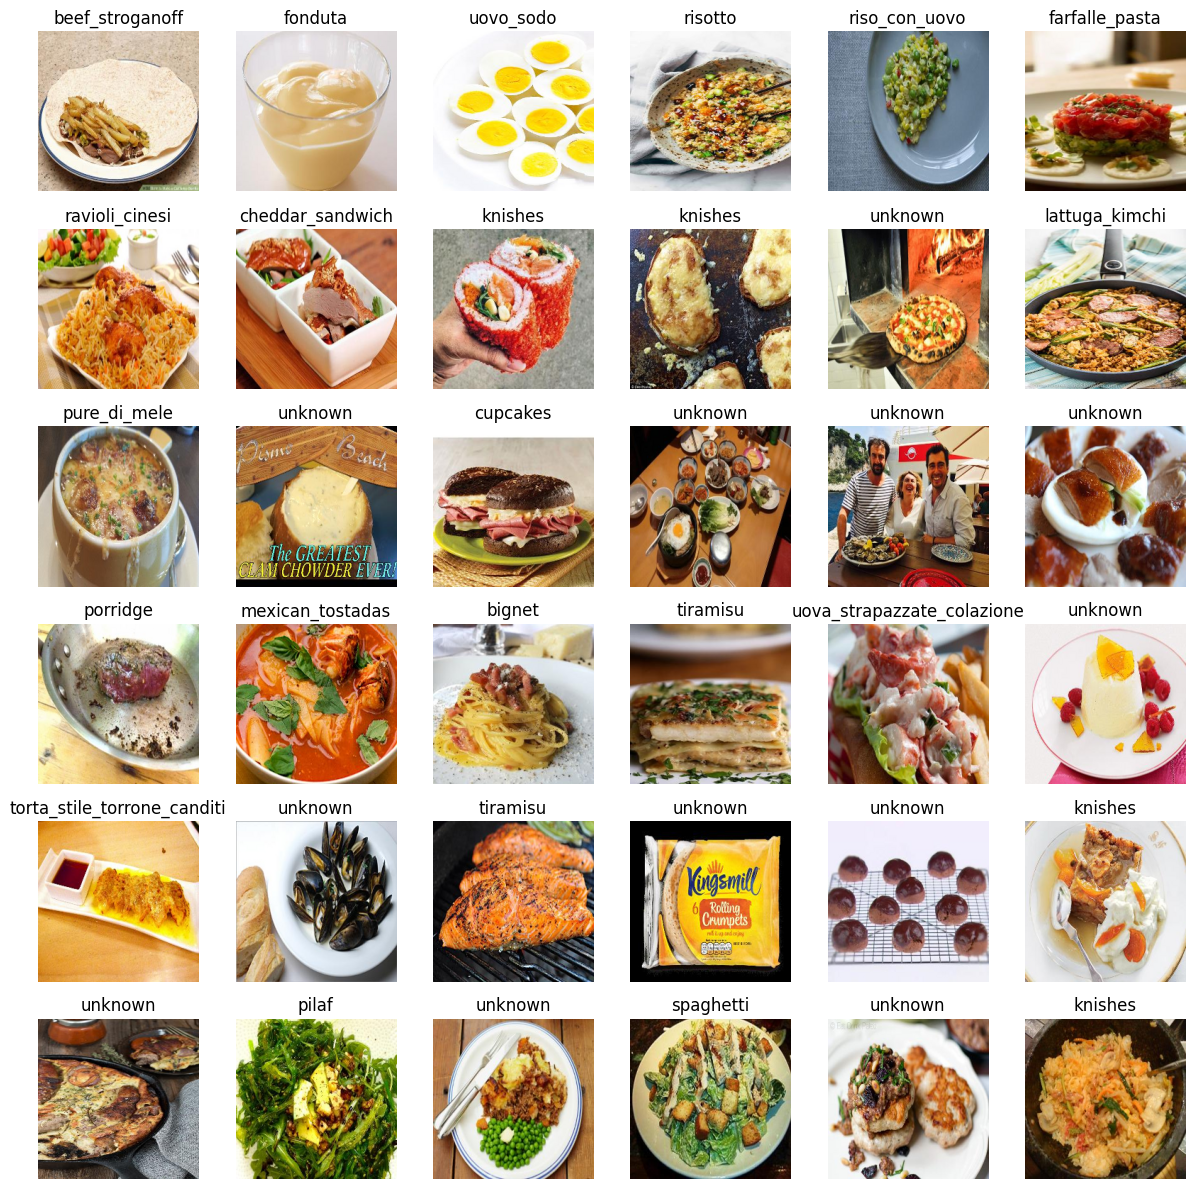

59.773515701293945
[41, 64, 124, 30, 80, 54, 8, 106, 10, 10, 'unknown', 14, 72, 'unknown', 21, 'unknown', 'unknown', 'unknown', 13, 6, 1, 5, 34, 'unknown', 31, 'unknown', 5, 'unknown', 'unknown', 10, 'unknown', 210, 'unknown', 75, 'unknown', 10]


In [16]:
rs = torch.utils.data.RandomSampler(X_unlabled_n, num_samples=36)


# Function to predict with threshold and progress bar
def knn_predict_with_threshold(knn, dataset_holder, img_dataset_indices, X, early_stop_at, threshold_distance):
    predictions = []
    dists=[]
    i=0
    
    figure, ax = plt.subplots(nrows=6, ncols=6, figsize=(12, 12))
    
    for sample_index in img_dataset_indices:
        if i>early_stop_at: break

        image = np.moveaxis(dataset_holder[sample_index][0], 0, -1)
        
        distances, _ = knn.kneighbors([X[sample_index]], n_neighbors=knn.n_neighbors)
        if np.min(distances) > threshold_distance:
            predictions.append('unknown')            
            dists.append(-1)
        else:
            prediction = knn.predict([X[sample_index]])
            predictions.append(prediction[0])
            dists.append(np.min(distances))
    

    
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_title('unknown' if predictions[-1]=='unknown' else translate_label[predictions[-1]])
        ax.ravel()[i].set_axis_off()
        #plt.figure()
        #plt.imshow(image)
        i+=1
    plt.tight_layout()
    plt.show()
    return dists, predictions


dists, predictions = knn_predict_with_threshold(knn, dataset_holder, rs, X_unlabled_n, 113456, threshold_distance=99)
print(np.mean(dists))
print(predictions)
